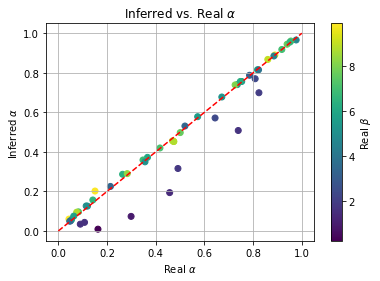

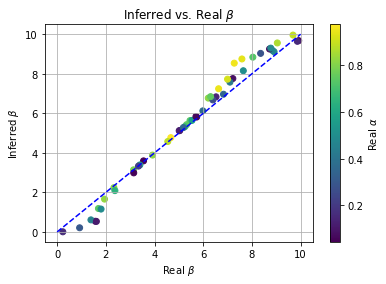

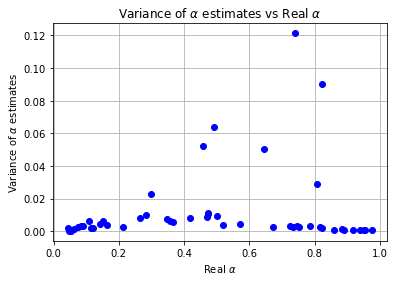

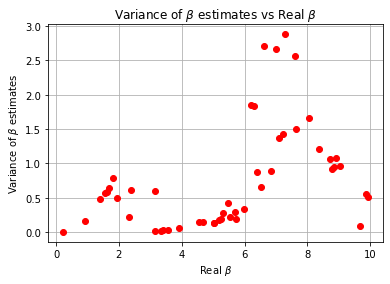

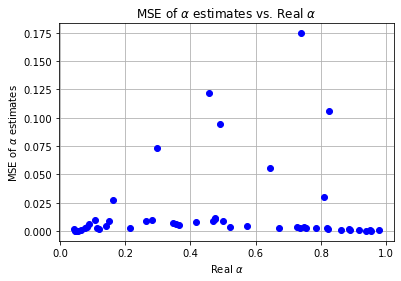

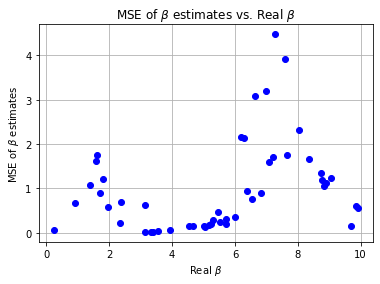

In [33]:
from NewOOP import Runs, Simulation
import numpy as np
import matplotlib.pyplot as plt
                           

def recovery_simulation(real_alpha, real_beta, Num_trials=1000, num_est=100):
    
    runs_simulation = Runs(Num_trials, 1, num_est)  # One mouse, 50 estimates
    alpha_estimates, beta_estimates = runs_simulation.estimate_alphas_betas([real_alpha], [real_beta])
    
    estimated_alpha = np.mean(alpha_estimates[0])
    estimated_beta = np.mean(beta_estimates[0])

    var_alpha = np.var(alpha_estimates[0])
    var_beta = np.var(beta_estimates[0])
    
    Dev_MSE_alpha=[]
    Dev_MSE_beta=[]
    for i in range(num_est):
        Dev_MSE_alpha.append((alpha_estimates[0][i]-real_alpha)**2)
        Dev_MSE_beta.append((beta_estimates[0][i]-real_beta)**2)
    mseALPHA_j = np.sum(Dev_MSE_alpha)/num_est
    mseBETA_j = np.sum(Dev_MSE_beta)/num_est

    return estimated_alpha, estimated_beta, mseALPHA_j, mseBETA_j, var_alpha, var_beta

# Generating a set of real alphas and betas
num_mice = 50
real_alphas = np.random.uniform(0, 1, num_mice)
real_betas = np.random.uniform(0, 10, num_mice)

estimated_alphas = []
estimated_betas = []
var_alphas = []
var_betas = []
mseALPHA=[]
mseBETA=[]

for j in range(num_mice):
    est_alpha, est_beta, mseALPHA_j, mseBETA_j, var_alpha, var_beta= recovery_simulation(real_alphas[j], real_betas[j])
    estimated_alphas.append(est_alpha)
    estimated_betas.append(est_beta)
    var_alphas.append(var_alpha)
    var_betas.append(var_beta)
    mseALPHA.append(mseALPHA_j)
    mseBETA.append(mseBETA_j)

# For the alpha plot
plt.figure()
plt.scatter(real_alphas, estimated_alphas, c=real_betas)
plt.colorbar().set_label(r'Real $\beta$')
plt.plot([0, 1], [0, 1], 'r--')  # ideal line
plt.xlabel(r'Real $\alpha$')
plt.ylabel(r'Inferred $\alpha$')
plt.title(r'Inferred vs. Real $\alpha$')
plt.grid(True)
plt.show()

# For the beta plot
plt.figure()
plt.scatter(real_betas, estimated_betas, c=real_alphas)
plt.colorbar().set_label(r'Real $\alpha$')
plt.plot([0, 10], [0, 10], 'b--')  # ideal line
plt.xlabel(r'Real $\beta$')
plt.ylabel(r'Inferred $\beta$')
plt.title(r'Inferred vs. Real $\beta$')
plt.grid(True)
plt.show()


# Plotting the estimated alphas against real alphas
plt.figure()
plt.plot(real_alphas, var_alphas, 'bo')
plt.xlabel(r'Real $\alpha$')
plt.ylabel(r'Variance of $\alpha$ estimates')
plt.title(r'Variance of $\alpha$ estimates vs Real $\alpha$')
plt.grid(True)
plt.show()

# Plotting the estimated betas against real betas
plt.figure()
plt.plot(real_betas, var_betas, 'ro')
plt.xlabel(r'Real $\beta$')
plt.ylabel(r'Variance of $\beta$ estimates')
plt.title(r'Variance of $\beta$ estimates vs Real $\beta$')
plt.grid(True)
plt.show()




plt.figure()
plt.plot(real_alphas, mseALPHA, 'bo')
plt.xlabel(r'Real $\alpha$')
plt.ylabel(r'MSE of $\alpha$ estimates')
plt.title(r'MSE of $\alpha$ estimates vs. Real $\alpha$')
plt.grid(True)
plt.show()


plt.figure()
plt.plot(real_betas, mseBETA, 'bo')
plt.xlabel(r'Real $\beta$')
plt.ylabel(r'MSE of $\beta$ estimates')
plt.title(r'MSE of $\beta$ estimates vs. Real $\beta$')
plt.grid(True)
plt.show()











 

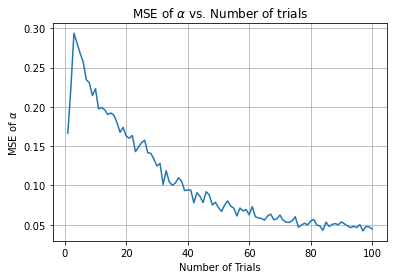

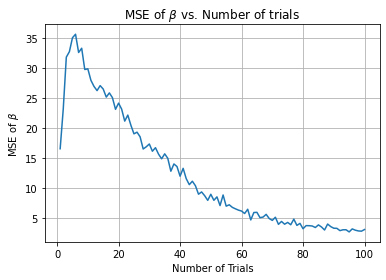

In [11]:
from NewOOP import Runs
import numpy as np
import matplotlib.pyplot as plt

def MSEvsTrial(num_est=50, real_alpha=0.2, real_beta=2):
   
    MSE_ALPHA_list = []
    MSE_BETA_list = []

    for i in range(1, 101):  # start range from 1
        runs_simulation = Runs(i, 1, num_est)  # One mouse, 100 estimates
        alpha_estimates, beta_estimates = runs_simulation.estimate_alphas_betas([real_alpha], [real_beta])

        Dev_MSE_alpha = [(alpha_estimates[0][j] - real_alpha)**2 for j in range(num_est)]
        Dev_MSE_beta = [(beta_estimates[0][j] - real_beta)**2 for j in range(num_est)]

        MSE_ALPHA = np.sum(Dev_MSE_alpha) / num_est
        MSE_BETA = np.sum(Dev_MSE_beta) / num_est

        MSE_ALPHA_list.append(MSE_ALPHA)
        MSE_BETA_list.append(MSE_BETA)

    return MSE_ALPHA_list, MSE_BETA_list

MSE_ALPHA_list, MSE_BETA_list = MSEvsTrial(num_est=1000, real_alpha=0.2, real_beta=2)

Num_trials = list(range(1, 101))

plt.figure()
plt.plot(Num_trials, MSE_ALPHA_list, label='MSE_ALPHA')
plt.xlabel('Number of Trials')
plt.ylabel(r'MSE of $\alpha$')
plt.title(r'MSE of $\alpha$ vs. Number of trials')
plt.grid(True)
plt.show()


plt.figure()
plt.plot(Num_trials, MSE_BETA_list, label='MSE_BETA')
plt.xlabel('Number of Trials')
plt.ylabel(r'MSE of $\beta$')
plt.title(r'MSE of $\beta$ vs. Number of trials')
plt.grid(True)
plt.show()



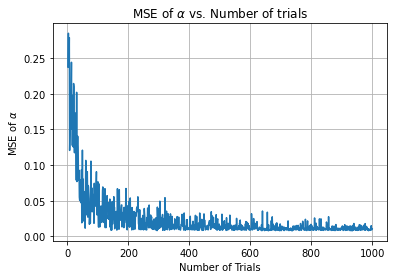

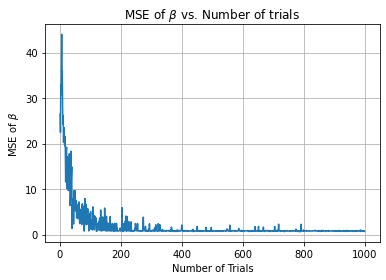

[0.23753586718970252, 0.26633949917295435, 0.284912385180389, 0.24611312816245004, 0.23703703840758686, 0.2786998672403022, 0.12054844203869301, 0.14338207204073136, 0.15159112151738222, 0.17663080341337797, 0.19143917064853092, 0.20537549032432587, 0.24418583283592224, 0.15059540073260302, 0.19788613146253076, 0.1275193789049826, 0.16761987230497094, 0.16673919362633075, 0.12536178301597686, 0.21438430852538481, 0.21004989499324908, 0.1312089578774503, 0.11729993658618706, 0.15837006205457008, 0.17318223728554677, 0.13304615833222733, 0.1282682790595696, 0.13601078712119447, 0.07874322760918154, 0.2020194061491544, 0.07687133171564059, 0.1278162883997602, 0.1407658669167759, 0.13936328885635318, 0.12472707274947797, 0.07859284631435566, 0.08880953373418601, 0.09265232629088206, 0.055059556692328294, 0.05063054899683679, 0.05425430871338838, 0.07957160890448074, 0.04839849919510823, 0.04726381126119136, 0.057177466821053645, 0.09344547332118819, 0.019031198900634982, 0.0608477138627300

"min_mse_alpha_index = np.argmin(MSE_ALPHA_list)\nmin_mse_beta_index = np.argmin(MSE_BETA_list)\n\noptimal_num_trials_alpha = Num_trials[min_mse_alpha_index]\noptimal_num_trials_beta = Num_trials[min_mse_beta_index]\n\nprint(f'Optimal number of trials for alpha: {optimal_num_trials_alpha}')\nprint(f'Optimal number of trials for beta: {optimal_num_trials_beta}')"

In [21]:
from NewOOP import Runs
import numpy as np
import matplotlib.pyplot as plt


def MSEvsTrial(num_est=50, real_alpha=0.1, real_beta=1):
   
    MSE_ALPHA_list = []
    MSE_BETA_list = []
    
    for i in range(1, 1001):  # start range from 1
        runs_simulation = Runs(i, 1, num_est)  # One mouse, 100 estimates
        alpha_estimates, beta_estimates = runs_simulation.estimate_alphas_betas([real_alpha], [real_beta])

        Dev_MSE_alpha = [(alpha_estimates[0][j] - real_alpha)**2 for j in range(num_est)]
        Dev_MSE_beta = [(beta_estimates[0][j] - real_beta)**2 for j in range(num_est)]


        MSE_ALPHA = np.sum(Dev_MSE_alpha) / num_est
        MSE_BETA = np.sum(Dev_MSE_beta) / num_est

        MSE_ALPHA_list.append(MSE_ALPHA)
        MSE_BETA_list.append(MSE_BETA)

    return MSE_ALPHA_list, MSE_BETA_list

MSE_ALPHA_list, MSE_BETA_list = MSEvsTrial(num_est=50, real_alpha=0.1, real_beta=1)

Num_trials = list(range(1, 1001))

plt.figure()
plt.plot(Num_trials, MSE_ALPHA_list, label='MSE_ALPHA')
plt.xlabel('Number of Trials')
plt.ylabel(r'MSE of $\alpha$')
plt.title(r'MSE of $\alpha$ vs. Number of trials')
plt.grid(True)
plt.show()


plt.figure()
plt.plot(Num_trials, MSE_BETA_list, label='MSE_BETA')
plt.xlabel('Number of Trials')
plt.ylabel(r'MSE of $\beta$')
plt.title(r'MSE of $\beta$ vs. Number of trials')
plt.grid(True)
plt.show()

print(MSE_ALPHA_list)
print(MSE_BETA_list)
'''min_mse_alpha_index = np.argmin(MSE_ALPHA_list)
min_mse_beta_index = np.argmin(MSE_BETA_list)

optimal_num_trials_alpha = Num_trials[min_mse_alpha_index]
optimal_num_trials_beta = Num_trials[min_mse_beta_index]

print(f'Optimal number of trials for alpha: {optimal_num_trials_alpha}')
print(f'Optimal number of trials for beta: {optimal_num_trials_beta}')'''


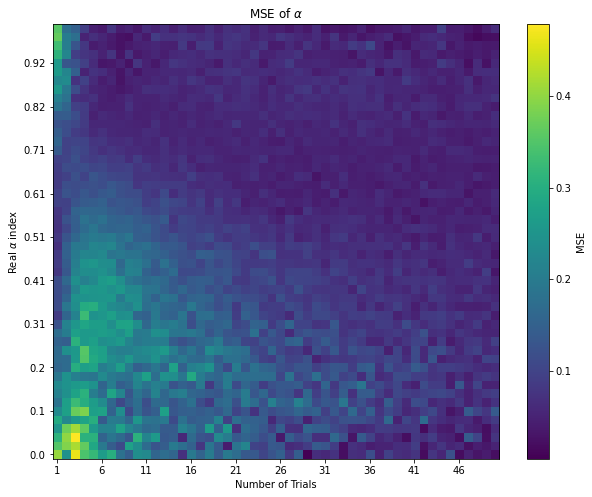

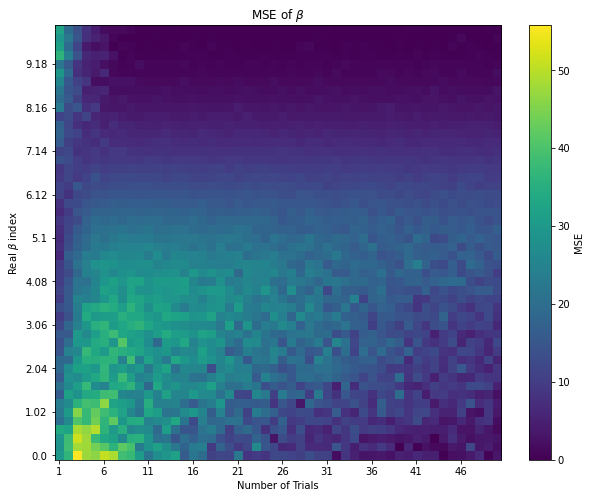

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from NewOOP import Runs

def MSEvsTrial(real_alpha, real_beta, num_est=50):
   
    MSE_ALPHA_list = []
    MSE_BETA_list = []
    
    for i in range(1, 51):  # start range from 1
        runs_simulation = Runs(i, 1, num_est)  # One mouse, 100 estimates
        alpha_estimates, beta_estimates = runs_simulation.estimate_alphas_betas([real_alpha], [real_beta])

        Dev_MSE_alpha = [(alpha_estimates[0][j] - real_alpha)**2 for j in range(num_est)]
        Dev_MSE_beta = [(beta_estimates[0][j] - real_beta)**2 for j in range(num_est)]

        MSE_ALPHA = np.sum(Dev_MSE_alpha) / num_est
        MSE_BETA = np.sum(Dev_MSE_beta) / num_est

        MSE_ALPHA_list.append(MSE_ALPHA)
        MSE_BETA_list.append(MSE_BETA)

    return np.array(MSE_ALPHA_list), np.array(MSE_BETA_list)

num_mice = 50
num_trials = 50 
real_alphas = np.linspace(0,1,num_mice)
real_betas = np.linspace(0,10,num_mice)

MSE_ALPHA_matrix = np.zeros((num_mice, num_trials))
MSE_BETA_matrix = np.zeros((num_mice, num_trials))

for j in range(num_mice):
    MSE_ALPHA_matrix[j], MSE_BETA_matrix[j] = MSEvsTrial(real_alphas[j], real_betas[j])

Num_trials = np.arange(1, num_trials+1)

plt.figure(figsize=(10, 8))
plt.imshow(MSE_ALPHA_matrix, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='MSE')
plt.xlabel('Number of Trials')
plt.ylabel(r'Real $\alpha$ index')
plt.title(r'MSE of $\alpha$')
plt.xticks(np.arange(0, num_trials, 5), np.arange(1, num_trials+1, 5))
plt.yticks(np.arange(0, num_mice, 5), np.round(real_alphas, 2)[::5])
plt.show()

plt.figure(figsize=(10, 8))
plt.imshow(MSE_BETA_matrix, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='MSE')
plt.xlabel('Number of Trials')
plt.ylabel(r'Real $\beta$ index')
plt.title(r'MSE of $\beta$')
plt.xticks(np.arange(0, num_trials, 5), np.arange(1, num_trials+1, 5))
plt.yticks(np.arange(0, num_mice, 5), np.round(real_betas, 2)[::5])
plt.show()
